In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#stats libraries
import statsmodels.api as sm

%matplotlib inline

correlation analysis parametric - use Pearsons
if not, spearman's rank correlation

In [60]:
#here I import the data
nucleotide_data = pd.read_csv('spacer_nucleotides.csv', sep = ',')

In [61]:
nucleotide_data.head(n=5)

,spacer,A,T,C,G
0,spacer0,8,4,5,15
1,spacer1,8,7,5,12
2,spacer2,7,8,11,6
3,spacer3,8,6,12,6
4,spacer4,9,8,9,6


I would like to address the question: is there a relationship between number of A's and T's
in spacers??

[]

/Users/nicoharacrudele/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


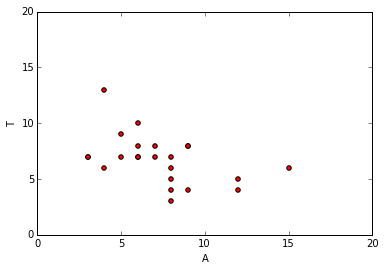

In [62]:

nucleotide_data.plot(kind='scatter', x='A', y="T", color = 'r')

plt.xlim(0,20)
plt.ylim(0, 20)

plt.plot(c="g", linewidth='3')

In [63]:
lm = sm.formula.ols(formula="A ~ T", data = nucleotide_data).fit()

lm.params

print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     5.875
Date:                Wed, 04 Nov 2015   Prob (F-statistic):             0.0245
Time:                        19:45:07   Log-Likelihood:                -54.134
No. Observations:                  23   AIC:                             112.3
Df Residuals:                      21   BIC:                             114.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     11.5616      1.842      6.276      0.0

In [64]:
x_new = pd.DataFrame({'T' : range(1,20)})

In [65]:
T = Thymine

NameError: name 'Thymine' is not defined

In [ ]:
y_preds = lm.predict(x_new)

In [ ]:
#creting new data frame
x_new = pd.DataFrame({'T' : range(1,20)})

In [ ]:
x_new.head(n=5)

In [ ]:
y_preds = lm.predict(x_new)
y_preds [1:10]

/Users/nicoharacrudele/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


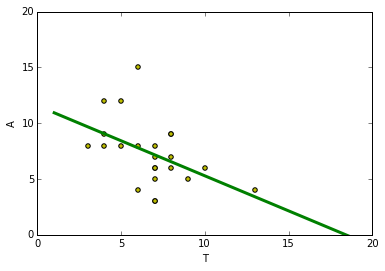

In [66]:
nucleotide_data.plot(kind='scatter', x='T', y='A', color= 'y')

plt.xlim(0,20)
plt.ylim(0, 20)
\
plt.plot(x_new, y_preds, c="g", linewidth='3')

here is the scatter plot of A's vs T's with a linear regression line.

I didn't use much data, so the line doesn't mean a whole lot in this context, but modeling the relationship between a scalar dependent variable y and one or more explanatory variables would be an extremely useful tool in a scientific setting with tons of data points to analyze.